In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

print('Imports complete.')

Imports complete.


In [2]:
full = pd.read_csv('../../dataset_full.csv')

In [3]:
full_cp = full.copy()

In [4]:
full_cp.columns = full_cp.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [5]:
full_cp.dtypes

unnamed:_0          int64
flow_id            object
source_ip          object
source_port         int64
destination_ip     object
                   ...   
idle_mean         float64
idle_std          float64
idle_max          float64
idle_min          float64
label               int64
Length: 86, dtype: object

In [6]:
full_cp = full_cp.drop(['unnamed:_0'], axis=1)

In [7]:
full_cp.head()

,flow_id,source_ip,source_port,destination_ip,destination_port,protocol,timestamp,flow_duration,total_fwd_packets,total_backward_packets,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,180.163.251.178-10.42.0.211-80-48716-6,10.42.0.211,48716,180.163.251.178,80,6,21/06/2017 05:42:14,4551,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,10.42.0.151-101.251.204.125-37904-80-6,10.42.0.151,37904,101.251.204.125,80,6,16/07/2017 01:29:58,1644985,3,2,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,216.58.219.195-10.42.0.211-80-51373-6,216.58.219.195,80,10.42.0.211,51373,6,28/07/2017 03:47:46,4180,1,1,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,203.205.158.61-10.42.0.42-80-47121-6,10.42.0.42,47121,203.205.158.61,80,6,02/07/2017 12:54:08,283,2,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,151.101.117.140-10.42.0.151-443-54083-6,10.42.0.151,54083,151.101.117.140,443,6,21/07/2017 12:29:56,1965,3,0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [8]:
full_cp = full_cp.drop(['flow_id', 'source_ip', 'destination_ip', 'timestamp'], axis=1)
full_cp.columns

Index(['source_port', 'destination_port', 'protocol', 'flow_duration',
       'total_fwd_packets', 'total_backward_packets',
       'total_length_of_fwd_packets', 'total_length_of_bwd_packets',
       'fwd_packet_length_max', 'fwd_packet_length_min',
       'fwd_packet_length_mean', 'fwd_packet_length_std',
       'bwd_packet_length_max', 'bwd_packet_length_min',
       'bwd_packet_length_mean', 'bwd_packet_length_std', 'flow_bytes/s',
       'flow_packets/s', 'flow_iat_mean', 'flow_iat_std', 'flow_iat_max',
       'flow_iat_min', 'fwd_iat_total', 'fwd_iat_mean', 'fwd_iat_std',
       'fwd_iat_max', 'fwd_iat_min', 'bwd_iat_total', 'bwd_iat_mean',
       'bwd_iat_std', 'bwd_iat_max', 'bwd_iat_min', 'fwd_psh_flags',
       'bwd_psh_flags', 'fwd_urg_flags', 'bwd_urg_flags', 'fwd_header_length',
       'bwd_header_length', 'fwd_packets/s', 'bwd_packets/s',
       'min_packet_length', 'max_packet_length', 'packet_length_mean',
       'packet_length_std', 'packet_length_variance', 'fin_flag_

In [9]:
correlation = full_cp.corr()
correlation['label'].sort_values(ascending = False)


label                   1.000000
ack_flag_count          0.059928
urg_flag_count          0.057274
down/up_ratio           0.020224
fwd_psh_flags           0.013857
                          ...   
fwd_avg_packets/bulk         NaN
fwd_avg_bulk_rate            NaN
bwd_avg_bytes/bulk           NaN
bwd_avg_packets/bulk         NaN
bwd_avg_bulk_rate            NaN
Name: label, Length: 81, dtype: float64

In [10]:
correlation

,source_port,destination_port,protocol,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
source_port,1.000000,-0.707761,-0.099972,0.079602,0.025231,0.022069,-0.001428,0.019951,0.190112,-0.101601,...,-0.000864,0.053896,0.002352,0.046340,0.056913,0.025520,-0.005671,0.022564,0.027931,-0.008040
destination_port,-0.707761,1.000000,-0.158168,-0.108404,-0.018820,-0.017338,0.002901,-0.016261,-0.141550,0.070608,...,0.000748,-0.039708,0.002027,-0.032860,-0.042620,-0.045868,-0.018232,-0.045848,-0.044266,0.010249
protocol,-0.099972,-0.158168,1.000000,-0.254333,-0.029898,-0.022990,-0.002415,-0.020447,-0.128729,0.255375,...,-0.003891,-0.071034,-0.021050,-0.067215,-0.069748,-0.151037,-0.071953,-0.155534,-0.142742,-0.050592
flow_duration,0.079602,-0.108404,-0.254333,1.000000,0.039185,0.020676,0.004897,0.013299,0.204612,-0.085054,...,0.000579,0.322706,0.241149,0.352422,0.270505,0.727222,0.386458,0.758205,0.680545,-0.018130
total_fwd_packets,0.025231,-0.018820,-0.029898,0.039185,1.000000,0.746205,0.686729,0.694265,0.091688,-0.011812,...,-0.001976,0.054645,0.039813,0.059038,0.046135,0.025246,0.018101,0.027297,0.022900,0.008881
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
idle_mean,0.025520,-0.045868,-0.151037,0.727222,0.025246,0.010865,0.002795,0.004461,0.212406,-0.050629,...,-0.000113,0.342881,0.104759,0.325260,0.332263,1.000000,0.239072,0.987007,0.987259,-0.021507
idle_std,-0.005671,-0.018232,-0.071953,0.386458,0.018101,0.008235,0.002484,0.003609,0.098845,-0.016956,...,0.000948,0.179898,0.358381,0.248176,0.093923,0.239072,1.000000,0.386888,0.083295,0.000568
idle_max,0.022564,-0.045848,-0.155534,0.758205,0.027297,0.011794,0.003098,0.004839,0.217275,-0.050565,...,0.000035,0.359292,0.165049,0.356344,0.333097,0.987007,0.386888,1.000000,0.949775,-0.020572
idle_min,0.027931,-0.044266,-0.142742,0.680545,0.022900,0.009832,0.002448,0.004045,0.202077,-0.049276,...,-0.000267,0.321253,0.047575,0.291310,0.324727,0.987259,0.083295,0.949775,1.000000,-0.022050


In [11]:
import numpy as np

with open("sample.txt", "w+") as f:
  data = f.read()
  f.write(str(correlation['label'].sort_values(ascending = False)))

In [12]:
dup_va = full_cp.duplicated().sum()

In [13]:
full_cp.head()

,source_port,destination_port,protocol,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,48716,80,6,4551,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,37904,80,6,1644985,3,2,502.0,376.0,502.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,80,51373,6,4180,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,47121,80,6,283,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,54083,443,6,1965,3,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


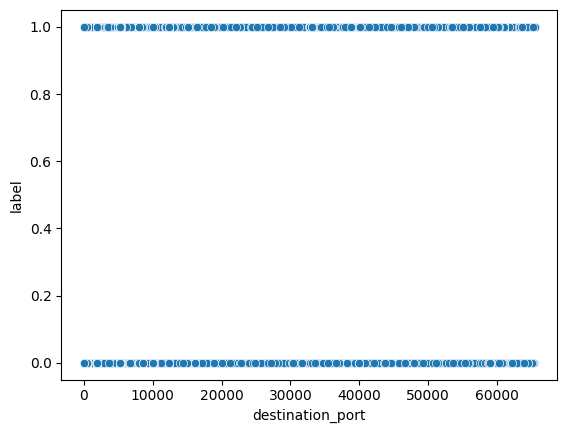

In [14]:
feature = full_cp.columns[1]
plot = sns.scatterplot(x = full_cp[feature], y = full_cp['label'])

In [21]:
full_cp.loc[full_cp.init_win_bytes_backward < 0].shape[0]

int

In [27]:
for ft in full_cp.columns:
    if full_cp.loc[full_cp[ft] < 0].size > 0:
        print(ft)
        print(full_cp.loc[full_cp[ft] < 0].shape[0])

flow_iat_min
3644
fwd_header_length
558
bwd_header_length
361
fwd_header_length.1
558
init_win_bytes_forward
379959
init_win_bytes_backward
891487
min_seg_size_forward
650


In [28]:
full_cp = full_cp.drop(['init_win_bytes_forward', 'init_win_bytes_backward'], axis=1)

In [33]:
full_cp.shape

(1805320, 79)

In [35]:
full_cp = full_cp.drop(full_cp.loc[full_cp['flow_iat_min'] < 0].index, axis=0)

In [37]:
full_cp = full_cp.drop(['fwd_header_length.1'], axis=1)
full_cp = full_cp.drop(full_cp.loc[full_cp['fwd_header_length'] < 0].index, axis=0)
full_cp = full_cp.drop(full_cp.loc[full_cp['bwd_header_length'] < 0].index, axis=0)
full_cp = full_cp.drop(full_cp.loc[full_cp['min_seg_size_forward'] < 0].index, axis=0)

In [42]:
full_cp = full_cp.drop_duplicates()

In [43]:
full_cp.duplicated().sum()

0

In [74]:
full_cp.head()

,source_port,destination_port,protocol,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
0,48716,80,6,4551,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
1,37904,80,6,1644985,3,2,502.0,376.0,502.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,80,51373,6,4180,1,1,0.0,0.0,0.0,0.0,...,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,47121,80,6,283,2,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,54083,443,6,1965,3,0,0.0,0.0,0.0,0.0,...,20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [75]:
full_cp = full_cp.drop(['source_port', 'destination_port'], axis=1)

In [44]:
correlation = full_cp.corr()
correlation['label'].sort_values(ascending = False)

label                   1.000000
ack_flag_count          0.060750
urg_flag_count          0.057865
down/up_ratio           0.018509
syn_flag_count          0.014044
                          ...   
fwd_avg_packets/bulk         NaN
fwd_avg_bulk_rate            NaN
bwd_avg_bytes/bulk           NaN
bwd_avg_packets/bulk         NaN
bwd_avg_bulk_rate            NaN
Name: label, Length: 78, dtype: float64

In [76]:
full_cp.describe()

,protocol,flow_duration,total_fwd_packets,total_backward_packets,total_length_of_fwd_packets,total_length_of_bwd_packets,fwd_packet_length_max,fwd_packet_length_min,fwd_packet_length_mean,fwd_packet_length_std,...,min_seg_size_forward,active_mean,active_std,active_max,active_min,idle_mean,idle_std,idle_max,idle_min,label
count,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,...,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06,1.796623e+06
mean,8.181798e+00,1.063593e+07,6.868497e+00,9.266145e+00,6.980922e+02,9.485912e+03,2.048424e+02,1.176219e+01,5.758322e+01,7.504990e+01,...,1.071587e+03,1.431349e+05,1.975836e+04,1.620283e+05,1.277343e+05,4.023448e+06,3.521844e+05,4.323779e+06,3.754143e+06,7.227999e-01
std,4.476953e+00,2.210541e+07,3.408798e+01,1.077396e+02,1.313174e+04,1.541518e+05,3.774641e+02,5.445806e+01,1.237053e+02,1.524429e+02,...,4.219434e+05,8.228281e+05,2.777598e+05,9.472478e+05,7.828355e+05,1.456966e+07,3.120175e+06,1.536837e+07,1.418991e+07,4.476162e-01
min,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,6.000000e+00,4.753800e+04,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,6.000000e+00,4.950930e+05,2.000000e+00,1.000000e+00,3.100000e+01,0.000000e+00,3.100000e+01,0.000000e+00,2.566667e+01,0.000000e+00,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
75%,6.000000e+00,1.025316e+07,5.000000e+00,4.000000e+00,3.950000e+02,3.170000e+02,2.680000e+02,0.000000e+00,4.926667e+01,8.383946e+01,...,3.200000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
max,1.700000e+01,1.199999e+08,6.455000e+03,1.499800e+04,9.240188e+06,2.161738e+07,1.368000e+04,1.460000e+03,2.958750e+03,4.998989e+03,...,1.705249e+08,1.096753e+08,4.990924e+07,1.096753e+08,1.096753e+08,1.199514e+08,7.737303e+07,1.199514e+08,1.199514e+08,1.000000e+00


In [77]:
full_cpz = full_cp.copy()
X = full_cpz.drop(['label'], axis = 1)
y = full_cpz.label

In [78]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = scaler.fit_transform(X)

In [79]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [80]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_absolute_error
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from xgboost import XGBClassifier


model = RandomForestClassifier(random_state=27)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=27)

In [81]:
preds_val = model.predict(X_test)
print(accuracy_score(y_test, preds_val))


0.7433075906213038


In [82]:
print(precision_score(y_test, preds_val))
print(recall_score(y_test, preds_val))
print(roc_auc_score(y_test, preds_val))

0.7770764833203906
0.9046823964821433
0.6129846978486939


In [ ]:
feature_scores = pd.Series(model.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print(feature_scores)

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

data={'feature_names':feature_scores.index,'feature_importance':feature_scores}
feature_importance = pd.DataFrame(data)

feature_importance.sort_values(by=['feature_importance'], ascending=False,inplace=True)

plt.figure(figsize=(10,15))

sns.barplot(x=feature_importance['feature_importance'], y=feature_importance['feature_names'])

plt.title('RanfomForestClassifier FEATURE IMPORTANCE')
plt.xlabel('FEATURE IMPORTANCE')
plt.ylabel('FEATURE NAMES')

In [ ]:
features = feature_scores[feature_scores >= 0.03].index
features

In [ ]:
model = RandomForestClassifier(max_leaf_nodes=1200, random_state=42)
model.fit(X_train, y_train)
preds_val = model.predict(X_test)
mae = accuracy_score(y_test, preds_val)
precision = precision_score(y_test, preds_val)
recall = recall_score(y_test, preds_val)
roc_auc = roc_auc_score(y_test, preds_val)